In [4]:
import sys
sys.path.append('../')

In [5]:
# importnb allows us to load the code from other notebooks
from importnb import Notebook
with Notebook():
    import OfficeAutomation.common as common

In [12]:
import crestdsl.model as crest
import crestdsl.simulation as crestsim
import crestdsl.ml as crestml


In [7]:
import logging
fllog = logging.getLogger("crestdsl.ml.functionlearn")
fllog.setLevel(logging.DEBUG)
mllog = logging.getLogger("crestdsl.ml.functionlearn")
mllog.setLevel(logging.DEBUG)

DEBUG:crestdsl.ml.functionlearn--Creating dataset with 1000 datapoints
DEBUG:crestdsl.ml.functionlearn--Creating observation space
DEBUG:crestdsl.ml.functionlearn--Triggering regression on the data.
DEBUG:crestdsl.ml.functionlearn--The FastPiecewiseLinearRegressionLearner regression has a r2 score of 0.9997847931688493



def learned_function(value):
    if False:
        pass
    elif value < 0.10557196419981096:  # extend first range to before breakpoint
        return value * 94.71142879078826 + -2408.5540157656715
    elif value >= 0.10557196419981096 and value < 168.3976643389709:
        return value * 94.71142879078826 + -2408.5540157656715
    elif value >= 168.3976643389709 and value < 510.4271442615205:
        return value * 261.567482448806 + -30506.723732593862
    elif value >= 510.4271442615205 and value < 608.0525429984962:
        return value * 176.34866777178408 + 12991.272480350206
    elif value >= 608.0525429984962 and value < 703.1834591583424:
        return value * 81.07819404338751 + 70920.72630357314
    elif value >= 703.1834591583424 and value < 807.6477013342815:
        return value * -43.914751974750004 + 158813.69845499904
    elif value >= 807.6477013342815 and value < 929.4400906355279:
        return value * -162.8415333542842 + 254864.64006326447
    elif value >= 9


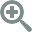
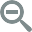
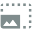
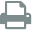

In [14]:
import math
class Environment(crest.Entity):
    state = current = crest.State()
    
    sun_intensity = crest.Output(resource=common.res_lux, value=0)
    time = crest.Local(resource=common.res_time, value=0)
    
    @crest.update(state=state, target=time)
    def update_time(self, dt):
        return self.time.value + dt

    @crestml.learn(learner='fastpiecewise', segments=9, samples=1000, ranges={time: (0, 1440)})
    @crest.influence(source=time, target=sun_intensity)
    def influence_sun_intensity(value):
        return (math.sin(((value % 1440)/1440.0) * 2 * math.pi - 0.5 * math.pi) + 1) * 63500

# env = Environment()

# learned = env.influence_sun_intensity.function
# df = learned.data
# model = learned.model

# print(learned.source)

# import matplotlib as plt
# import numpy as np
# import pandas as pd

# df = pd.DataFrame()
# df["x"] = np.arange(0, 1440, 10).reshape(-1,)
# df["defined"] = df.apply(lambda row: Environment().influence_sun_intensity.function.original_function(row["x"]), axis=1)
# df["regression"] = df.apply(lambda row: Environment().influence_sun_intensity.function(row["x"]), axis=1)

# # %matplotlib inline
# # df.plot()

# # crest.Validator(Environment()).check_all()

# sim = crestsim.Simulator(Environment())
# sim.system.time.value = 0
# sim.stabilise()
# for _ in range(144):
#     sim.advance(10)
# #     print(sim.system.time.value, sim.system.sun_intensity.value == model.predict([sim.system.time.value]), sim.system.sun_intensity.value, model.predict([sim.system.time.value]))
# sim.plot()
    

# # print(df[df["self.time.value"] == 720])
# # print(model.predict([720]))

# # X = df["self.time.value"]
# # y = df.function_return_value
# # plt.scatter(x=X, y=y,color='g',marker="x")
# # # print(model.predict(df["time"].values.reshape(-1,1)))
# # plt.plot(df["self.time.value"], model.predict(df["self.time.value"]),color='k')
# # plt.show()
# # df